In [1]:
import pandas as pd

import numpy as np

from scipy import stats

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Normal Distribution can be defined using Mean and Variance
# Constructing a normal distributed with mean (loc) as 5 and Standard Deviation (scale) as 3
# The number of trails of performing an experiment can be of any size
# Random State is used for replicability
nor_dis = pd.Series(stats.norm.rvs(loc = 5,scale = 3, size = 1000, random_state = 100 ))

nor_dis

0     -0.249296
1      6.028041
2      8.459107
3      4.242692
4      7.943962
         ...   
995    2.786034
996    8.979035
997    7.781011
998    5.639277
999    8.984999
Length: 1000, dtype: float64

C:\Users\vaibh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


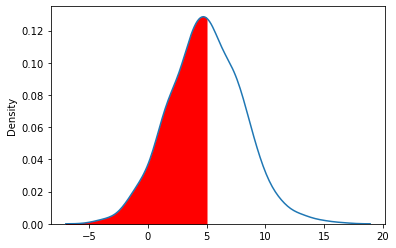

In [3]:
# Visualizing the distribution
# From the Visualization we can that the distribution is peaked at mean (5)
ax = sns.distplot(nor_dis, hist = False);

plot = ax.lines[0]

x = plot.get_xydata()[:,0]

y = plot.get_xydata()[:,1]

#plt.fill_between(nor_dis[z_scores < 0],stats.norm.pdf(z_scores[z_scores < 0],loc = 5,scale = 3))

ax.fill_between(x[x <= 5], y[x <= 5],color = 'red')

plt.show()

In [4]:
# this function is used to depict a histogramic representation of the continuous variable
# input to the function is a distribution we want to visualized
def distribution_plotting(distribution):
    
    # as most of the distribution we depict in Hypothesis testing will be related to Normal Distribution
    # the p_value is calculated.
    p_value = stats.shapiro(distribution).pvalue
    
    # Visualizing the distribution
    sns.displot(distribution, kind = 'kde');
    
    # labeling the axes and title
    plt.xlabel("Random Variable")    
    plt.ylabel('Probability Density Function')
    plt.title('Distribution (with the p value : %f)'%p_value)

    plt.show()


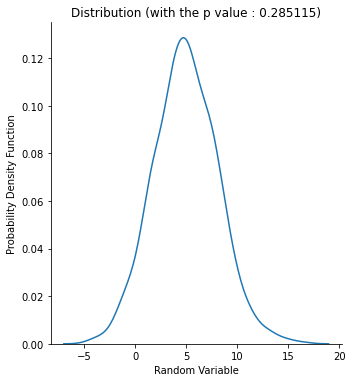

In [5]:
# calling the function with a distribution as an input
distribution_plotting(nor_dis)

In [6]:
# A normal distribution can be constructed with mean and variance
def normal_distribution_with_cdf(mean,var):
    
    # calculating standard deviation from variance
    std = np.sqrt(var)
    
    # Constructing a normal distributed dsitribution with mean (loc)and Standard Deviation as input
    # the size can be of any value
    nor_dis = pd.Series(stats.norm.rvs(loc = mean, scale = std, size = 10000))
    
    # Visualizing the distribution
    ax = sns.distplot(nor_dis, hist = False, label = "Distribution");
    
    # labeling the axes and title
    plt.xlabel("Random Variable")
    
    plt.ylabel('Probability Density Function')
    
    plt.title('Normal Distribution (with the area to the left)')
    
    # xticks are modified with the help of max and min of the distribution
    # step size is set to 2 for a better visibility
    plt.xticks(np.arange(int(nor_dis.min()),int(nor_dis.max()),2))    
   
    # here an input is taken from the user to select the random variable that is intended to visualize
    while True:
        
        # here a condition is added to restrict the user input to only the max and min of the constructed distribution
        random_var = int( input( 'Give the random variable between %d and %d:  '%(nor_dis.min(),nor_dis.max()) ) )
        
        if random_var > nor_dis.min() and random_var < nor_dis.max():
            break
        else:
            print('Please give an input in the boundaries')
            continue
    
    # here a choice of visualization is given to the user.
    while True:
        
        route = input( 'Visualization option - ["1 for Random Variable", "2 for Area to the Left", "3 for Both","4 for Only Distribution"]: ')
        
        if route in ["1","2","3","4"]:
            break
        else:
            print('Invalid Input')
            continue
    
    # route check is done
    if route in ["1","3"]:
        
        # Z_Score is calculated     
        z_score = (random_var - mean)/std
        
        # With the help of the calculated Z_Score the y coordinates are formulated
        # by calculating Probability Density Function
        pdf = stats.norm.pdf(z_score,loc = mean,scale = std)  
        
        # Visualizing the random variable
        plt.plot([random_var,random_var],[0,pdf],color = 'black', label = 'Random Variable')
    
    # route check is done
    if route in ["2","3"]:
        
        # Here for coloring the area, the coordinate points from the master plot ie., distribution plot is taken
        plot = ax.lines[0]
        
        # the x an y coordinates are seperated
        x_coordinates = plot.get_xydata()[:,0]
        y_coordinates = plot.get_xydata()[:,1]
        
        # here by using the fill_between the area to the left is been plotted
        #here, the coordinates are filtered using the random variable value
        ax.fill_between(x_coordinates[x_coordinates <= random_var],
                        y_coordinates[x_coordinates <= random_var],
                        color = 'red')
    plt.legend()
    
    plt.show()
    

C:\Users\vaibh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Give the random variable between -5 and 16:  10
Visualization option - ["1 for Random Variable", "2 for Area to the Left", "3 for Both","4 for Only Distribution"]: 3


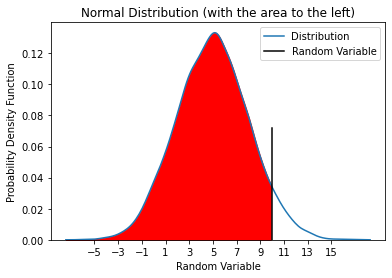

In [8]:
# calling the function with a mean and variance as inputs
normal_distribution_with_cdf(5,9);

In [9]:
def Z_hypo_test(samp_dist,pop_mean,pop_std, tail):
    
    '''
    # Hypothesis Testing for population parameter mean
    # Here the test statistic been used is Z
    # This is a visual simulation of the Hypothesis testing
    # Inputs to the function are,
    # samp_dist - sample distribution for which the test is been done, this is pandas series type
    # pop_mean - population mean
    # pop_std - population Standard Deviation
    # tail - the type of tail testing that needs to be done
    '''
    
    # calling the function to display the distribution
    distribution_plotting(samp_dist)
    
    # calculating the sample size and sample mean
    sample_size = samp_dist.size
    sample_mean = samp_dist.mean()
    
    # creating a Z-Distribution for visualization purpose
    z_dis = pd.Series(stats.norm.rvs(size = 10000))  
    
    # Visualizing the Z-distribution      
    ax = sns.distplot(z_dis, hist = False);
    
    # print the sample mean for the user's interpretation
    print('The Sample Mean: ',sample_mean)
    
    # labeling the axes and title
    plt.xlabel("Z - Value")    
    plt.ylabel('Probability Density Function')    
    plt.title('Z Distribution (With %s Tail Test)'%tail.title())
    
    # xticks are modified with the help of max and min of the distribution
    # step size is set to 2 for a better visibility
    plt.xticks(np.arange(int(z_dis.min()),int(z_dis.max()),2))
    
    # Here for coloring the area, the coordinate points from the master plot ie., distribution plot is taken
    plot = ax.lines[0]
    
    # the x an y coordinates are seperated
    x_coordinates = plot.get_xydata()[:,0]
    y_coordinates = plot.get_xydata()[:,1]
    
    # Z_Score is calculated
    # Here we are using making using Central Limit Theorem, which helps us to make use of the 
    # sample mean and population S.D/Sqrt(n) as an approxiamation
    z_score = (sample_mean - pop_mean)/(pop_std/np.sqrt(sample_size))
    
    # With the help of the calculated Z_Score,
    # the y coordinates are formulated by calculating Probability Density Function
    pdf = stats.norm.pdf(z_score)    
    
    # Visualizing the random variable Z
    plt.plot([z_score,z_score],[0,pdf],color = 'black',label = 'Z Value of the RV')

    # Visualizing where the value of Z is zero
    plt.plot([0,0],[0,stats.norm.pdf(0)],color = 'green',label = 'Z equal to zero')

    # Getting the input from user for minimum confidence level that needs to be set to reject the null hypothesis
    confidence_int = float( input('Give the Confidence Interval (in percent): ') )
    
    # Converting that into the significance level alpha
    alpha = 1 - confidence_int/100

    # Tail check is been done
    if tail.lower() == 'two':
        
        # for the proper visualizing purpose the alpha is been divided into half
        alpha = alpha/2
        
        # the critical Z - scores at the left and right tail
        # for left tail, ppf is used and right tail isf is used
        left_critical_z_score = stats.norm.ppf(alpha)
        right_critical_z_score = stats.norm.isf(alpha)

        # here by using the fill_between the area to the left is been plotted
        #here, the coordinates are filtered using the left critical value
        ax.fill_between(x_coordinates[x_coordinates <= left_critical_z_score],
                    y_coordinates[x_coordinates <= left_critical_z_score],
                    color = 'red')
        
        # here by using the fill_between the area to the right is been plotted
        #here, the coordinates are filtered using the right critical value
        ax.fill_between(x_coordinates[x_coordinates >= right_critical_z_score],
                    y_coordinates[x_coordinates >= right_critical_z_score],
                    color = 'red')


    else:
        # Tail check is been done
        if tail.lower() == 'right':
            
            # the critical right critical Z - scores  is been calculated with isf
            right_critical_z_score = stats.norm.isf(alpha)
            
            # here by using the fill_between the area to the right is been plotted
            # here, the coordinates are filtered using the right critical value
            ax.fill_between(x_coordinates[x_coordinates >= right_critical_z_score],
                        y_coordinates[x_coordinates >= right_critical_z_score],
                        color = 'red')
            
        # Tail check is been done
        elif tail.lower() == 'left':
            
            # the critical left critical Z - scores  is been calculated with ppf
            left_critical_z_score = stats.norm.ppf(alpha)
            
            # here by using the fill_between the area to the left is been plotted
            # here, the coordinates are filtered using the left critical value
            ax.fill_between(x_coordinates[x_coordinates <= left_critical_z_score],
                        y_coordinates[x_coordinates <= left_critical_z_score],
                        color = 'red')
    
    # the legend are being called
    plt.legend()
    
    # entire plot is being displayed
    plt.show()

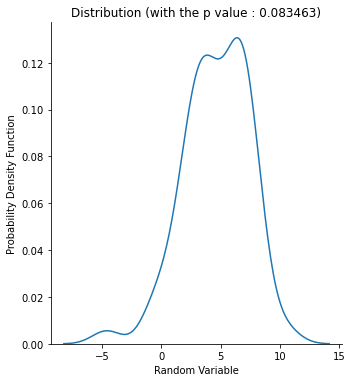

C:\Users\vaibh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


The Sample Mean:  4.63004895275005
Give the Confidence Interval (in percent): 95


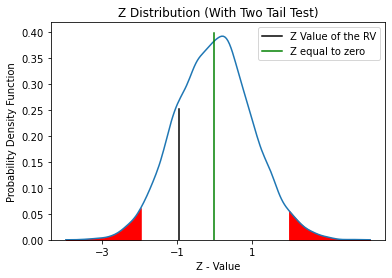

In [10]:
# a normal distribution is created for testing purpose
nor_dis = pd.Series(stats.norm.rvs(loc = 5,scale = 3, size = 1000))

# sampling is been done
samp_dist = nor_dis.sample(60)

# the method is been called
Z_hypo_test(samp_dist,5,3,'two')

In [11]:
def T_hypo_test(samp_dist,pop_mean,tail):
    
    '''
    # Hypothesis Testing for population parameter mean
    # Here the test statistic been used is T
    # This is a visual simulation of the Hypothesis testing
    # Inputs to the function are,
    # samp_dist - sample distribution for which the test is been done, this is pandas series type
    # pop_mean - population mean
    # tail - the type of tail testing that needs to be done
    '''
    
    # calling the function to display the distribution
    distribution_plotting(samp_dist)
    
    # calculating the sample standard and sample mean     
    sample_std = samp_dist.std()
    sample_mean = samp_dist.mean()
    
    # calculating the sample size and using it to calculate Degrees of freedom
    sample_size = samp_dist.size        
    deg_free =  sample_size - 1
    
    # creating a Z-Distribution for visualization purpose
    t_dis = pd.Series(stats.t.rvs(df = deg_free, size = 10000))
    
    # print the Sample Standard and sample mean for the user's interpretation
    print('The Sample Standard: ', sample_std)    
    print('The Sample Mean: ',sample_mean)
    
    # Visualizing the T - distribution
    ax = sns.distplot(t_dis, hist = False);
    
    # labeling the axes and title
    plt.xlabel("T - Value")    
    plt.ylabel('Probability Density Function')    
    plt.title('T Distribution (With %s Tail Test)'%tail.title())
    
    # xticks are modified with the help of max and min of the distribution
    # step size is set to 2 for a better visibility
    plt.xticks(np.arange(int(t_dis.min()),int(t_dis.max()),2))

    # Here for coloring the area, the coordinate points from the master plot ie., distribution plot is taken
    plot = ax.lines[0]
    
    # the x an y coordinates are seperated
    x_coordinates = plot.get_xydata()[:,0]
    y_coordinates = plot.get_xydata()[:,1]


    # T_Score is calculated
    # here the population standard deviation is unknown
    # Here we are using making using Central Limit Theorem, which helps us to make use of the 
    # sample mean and sample S.D/Sqrt(n) as an approxiamation
    t_score = (sample_mean - pop_mean)/(sample_std/np.sqrt(sample_size))
    
    # With the help of the calculated T_Score,
    # the y coordinates are formulated by calculating 
    # Probability Density Function for the specific degrees of freedom
    pdf = stats.t.pdf(t_score, df = deg_free)
    
    # Visualizing the random variable T 
    plt.plot([t_score,t_score],[0,pdf],color = 'black',label = 'T Value of the RV')

    # Visualizing where the value of T is zero for the specific degrees of freedom
    plt.plot([0,0],[0,stats.t.pdf(0, df = deg_free)],color = 'green',label = 'T equal to zero')

    # Getting the input from user for minimum confidence level that needs to be set to reject the null hypothesis
    confidence_int = float( input('Give the Confidence Interval (in percent): ') )
    
    # Converting that into the significance level alpha
    alpha = 1 - confidence_int/100

    # Tail check is been done
    if tail.lower() == 'two':
        # for the proper visualizing purpose the alpha is been divided into half
        alpha = alpha/2
        
        # the critical T - scores at the left and right tail
        # for left tail, ppf is used and right tail isf is used
        left_critical_t_score = stats.t.ppf(alpha, df = deg_free)
        right_critical_t_score = stats.t.isf(alpha, df = deg_free)

        # here by using the fill_between the area to the left is been plotted
        # here, the coordinates are filtered using the left critical value
        ax.fill_between(x_coordinates[x_coordinates <= left_critical_t_score],
                    y_coordinates[x_coordinates <= left_critical_t_score],
                    color = 'red')
        
        # here by using the fill_between the area to the right is been plotted
        # here, the coordinates are filtered using the right critical value
        ax.fill_between(x_coordinates[x_coordinates >= right_critical_t_score],
                    y_coordinates[x_coordinates >= right_critical_t_score],
                    color = 'red')


    else:
        # Tail check is been done
        if tail.lower() == 'right':
            
            # the critical right critical T - scores  is been calculated with isf
            right_critical_t_score = stats.t.isf(alpha, df = deg_free)
            
            # here by using the fill_between the area to the right is been plotted
            # here, the coordinates are filtered using the right critical value
            ax.fill_between(x_coordinates[x_coordinates >= right_critical_t_score],
                        y_coordinates[x_coordinates >= right_critical_t_score],
                        color = 'red')
        
        # Tail check is been done
        elif tail.lower() == 'left':
            
             # the critical left critical Z - scores  is been calculated with ppf
            left_critical_t_score = stats.t.ppf(alpha, df = deg_free)
            
            # here by using the fill_between the area to the left is been plotted
            # here, the coordinates are filtered using the left critical value
            ax.fill_between(x_coordinates[x_coordinates <= left_critical_t_score],
                        y_coordinates[x_coordinates <= left_critical_t_score],
                        color = 'red')
    
    # the legend are being called
    plt.legend()
    
    # entire plot is being displayed
    plt.show()  

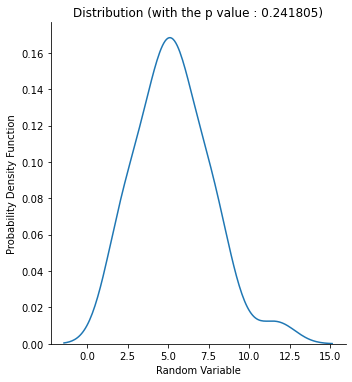

C:\Users\vaibh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


The Sample Standard:  2.2472469107513833
The Sample Mean:  5.325159057785505
Give the Confidence Interval (in percent): 90


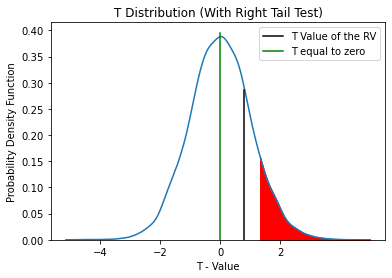

In [12]:
t_dist = pd.Series(stats.t.rvs(df = 80, size = 81, loc = 5,scale = 2))

samp_dist = t_dist.sample(30)

T_hypo_test(samp_dist,5,'right')

In [13]:
def selecting_hypo_testing_for_pop_mean(pop_dist,pop_mean = "unknown",pop_std = "unknown"):               
    
    '''
    # This function helps in the selecting of optimal hypothesis test
    # Inputs to the function are,
    # pop_dist - population distribution for which the test is been done, this is pandas series type
    # pop_mean - population mean, default value "unknown"
    # pop_std - population standard deviation, default value "unknown"
    '''
    
    # initial step is check for normality and capturing the pvalue
    # this normality test is been done using shapiro test
    normality_test = stats.shapiro(pop_dist).pvalue
    
    # creating a variable with default value as 'Yes'
    output_value = 'Yes'
    
    # For comparing the resultant p_value, the default alpha of 0.05 is used
    if normality_test > 0.05:
        
        # Informing the user when the population is normally distributed
        print('The Distribution follows Normal Distribution')
        
    else:
        # When the population is not normally distributed, taking the user consent
        output_value = input('The Distribution does not follow Normal Distribution, would you like to continue ("Yes", "No"): ')
        
    # if the user tell yes
    if output_value.lower() == 'yes':        
        
        # the sample size request
        while True:
            
            sample_size = int(input('\nThe Sample Size (maximum size is %d): '%pop_dist.size))
            
            # Checking where the sample size is less than the population size
            if sample_size <= pop_dist.size:
                break
            
            else:
                print('Please give the sample size in the boundary')
                continue
         
        # using sampling, to obtain sample distribution form the population 
        sample_dist = pop_dist.sample(n = sample_size)
        
        # Getting the tail information from the user
        while True:
            
            tail_info = input('\nBased on the Hypothesis formed, share which the tail info ["Left", "Right","Two"]: ')
            
            # checking for validity of the input and alerting the user otherwise
            if tail_info.title() in ["Left", "Right","Two"]:
                
                break 
                
            else:
                print('Please share valid tail')
                
                continue       
        
        # if the population mean is not given, the user is informed              
        if  pop_mean == 'unknown':
            
            print('\nThe population mean is unknown')                
            
            # once the user is informed, asking for the Hypothesized value as an alternative for population mean
            pop_mean = float(input('Share the Hypothesized/ claimed Value, so that it can be interpreted as population mean:'))                
              

        # Now the actual implementation of the method will start
        
        # here a check is been done for the sample size and the presence of population standard deviation
        #  Z Test can be done only when the sample size is large (30) and the population standard deviation is known
        # The Normality check is not added as the sample being considered is of large size.
        if sample_dist.size > 30 and (not pop_std == "unknown"):
            
            # Informing the user of the choosen Test
            print('\nThe choosen test is Z-Test')
            
            # the Z hypothesis test is been invoked
            Z_hypo_test(sample_dist,pop_mean,pop_std,tail_info)

         # here a check is been done for the normality, sample size and the presence of population standard deviation
        # T Test can be done only when the population is Normally Distributed and the population standard deviation is unknown
        # Here if the sample size is less than T-test is being used
        elif normality_test > 0.05 and (sample_dist.size < 30 or pop_std == "unknown"):
            
            # Informing the user of the choosen Test
            print('\nThe choosen test is T-Test')
            
            # the Z hypothesis test is been invoked
            T_hypo_test(sample_dist, pop_mean,tail_info)
            
        else:        
            print('\nPlease look for other methods')
            
    else:
        print('\nPlease try with another distribution')        
            

The Distribution follows Normal Distribution

The Sample Size (maximum size is 81): 29

Based on the Hypothesis formed, share which the tail info ["Left", "Right","Two"]: two

The population mean is unknown
Share the Hypothesized/ claimed Value, so that it can be interpreted as population mean:4.8

The choosen test is T-Test


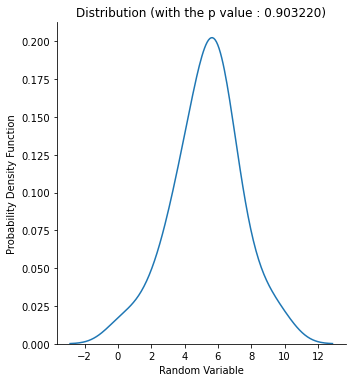

The Sample Standard:  2.022186276812543
The Sample Mean:  5.319048850386165


C:\Users\vaibh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Give the Confidence Interval (in percent): 90


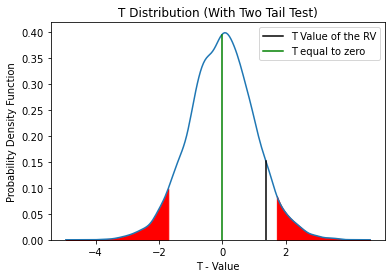

In [19]:
pop_distribution = pd.Series(stats.t.rvs(df = 80, size = 81, loc = 5,scale = 2))

selecting_hypo_testing_for_pop_mean(pop_distribution)

In [57]:
def Z_hypo_test_for_prop(samp_dist,samp_prop,hypo_prop,tail):
    
    '''
    # Hypothesis Testing for population parameter proportion
    # Here the test statistic been used is Z
    # This is a visual simulation of the Hypothesis testing
    # Inputs to the function are,
    # samp_dist - sample distribution for which the test is been done, this is pandas series type
    # samp_prop - probability of success for the event of interest
    # hypo_prop - the hypothesized probability of success for the event of interest
    '''
    
    # calling the function to display the distribution
    distribution_plotting(samp_dist)
    
    # calculating the sample size
    sample_size = samp_dist.size   
    
    # creating a Z-Distribution for visualization purpose
    z_dis = pd.Series(stats.norm.rvs(size = 10000))  
    
    # Visualizing the Z-distribution      
    ax = sns.distplot(z_dis, hist = False);
    
    # print the sample Proportion and hypothesized Proportion for the user's interpretation
    print('The Sample Proportion: ',samp_prop)
    print('The Hypothesized Proportion: ',hypo_prop)
    
    # labeling the axes and title
    plt.xlabel("Z - Value")    
    plt.ylabel('Probability Density Function')    
    plt.title('Z Distribution (With %s Tail Test)'%tail.title())
    
    # xticks are modified with the help of max and min of the distribution
    # step size is set to 2 for a better visibility
    plt.xticks(np.arange(int(z_dis.min()),int(z_dis.max()),2))
    
    # Here for coloring the area, the coordinate points from the master plot ie., distribution plot is taken
    plot = ax.lines[0]
    
    # the x an y coordinates are seperated
    x_coordinates = plot.get_xydata()[:,0]
    y_coordinates = plot.get_xydata()[:,1]
    
    # Z_Score is calculated
    # Here we are using making using Central Limit Theorem for proportion
    z_score = (samp_prop - hypo_prop)/np.sqrt(hypo_prop*(1 - hypo_prop)/sample_size)
    
    # With the help of the calculated Z_Score,
    # the y coordinates are formulated by calculating Probability Density Function
    pdf = stats.norm.pdf(z_score)    
    
    
    # Visualizing the random variable Z
    plt.plot([z_score,z_score],[0,pdf],color = 'black',label = 'Z Value of the RV')

    # Visualizing where the value of Z is zero
    plt.plot([0,0],[0,stats.norm.pdf(0)],color = 'green',label = 'Z equal to zero')

    # Getting the input from user for minimum confidence level that needs to be set to reject the null hypothesis
    confidence_int = float( input('Give the Confidence Interval (in percent): ') )
    
    # Converting that into the significance level alpha
    alpha = 1 - confidence_int/100

    # Tail check is been done
    if tail.lower() == 'two':
        
        # for the proper visualizing purpose the alpha is been divided into half
        alpha = alpha/2
        
        # the critical Z - scores at the left and right tail
        # for left tail, ppf is used and right tail isf is used
        left_critical_z_score = stats.norm.ppf(alpha)
        right_critical_z_score = stats.norm.isf(alpha)

        # here by using the fill_between the area to the left is been plotted
        #here, the coordinates are filtered using the left critical value
        ax.fill_between(x_coordinates[x_coordinates <= left_critical_z_score],
                    y_coordinates[x_coordinates <= left_critical_z_score],
                    color = 'red')
        
        # here by using the fill_between the area to the right is been plotted
        #here, the coordinates are filtered using the right critical value
        ax.fill_between(x_coordinates[x_coordinates >= right_critical_z_score],
                    y_coordinates[x_coordinates >= right_critical_z_score],
                    color = 'red')


    else:
        # Tail check is been done
        if tail.lower() == 'right':
            
            # the critical right critical Z - scores  is been calculated with isf
            right_critical_z_score = stats.norm.isf(alpha)
            
            # here by using the fill_between the area to the right is been plotted
            # here, the coordinates are filtered using the right critical value
            ax.fill_between(x_coordinates[x_coordinates >= right_critical_z_score],
                        y_coordinates[x_coordinates >= right_critical_z_score],
                        color = 'red')
            
        # Tail check is been done
        elif tail.lower() == 'left':
            
            # the critical left critical Z - scores  is been calculated with ppf
            left_critical_z_score = stats.norm.ppf(alpha)
            
            # here by using the fill_between the area to the left is been plotted
            # here, the coordinates are filtered using the left critical value
            ax.fill_between(x_coordinates[x_coordinates <= left_critical_z_score],
                        y_coordinates[x_coordinates <= left_critical_z_score],
                        color = 'red')
    
    # the legend are being called
    plt.legend()
    
    # entire plot is being displayed
    plt.show()

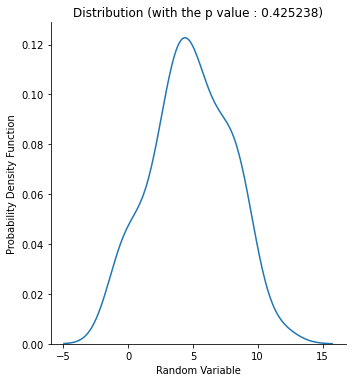

C:\Users\vaibh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


The Sample Proportion:  0.4
The Hypothesized Proportion:  0.48
Give the Confidence Interval (in percent): 90


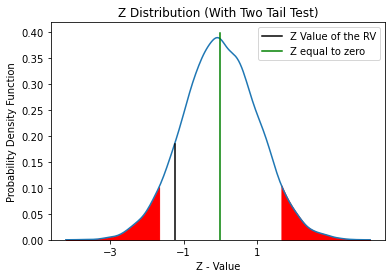

In [58]:
# a normal distribution is created for testing purpose
nor_dis = pd.Series(stats.norm.rvs(loc = 5,scale = 3, size = 1000))

# sampling is been done
samp_dist = nor_dis.sample(60)

# the method is been called
Z_hypo_test_for_prop(samp_dist,0.4,0.48,'two')

In [55]:
def prop_big_sample_test(sample_dist,p):
    
    '''
    # This function helps in the performing the big sample test and
    # invoking Z_test for proportion population parameter when the sample passed the test 
    # Inputs to the function are,
    # sample_dist - sample distribution for which the test is been done, this is pandas series type
    # p - probability of success for the event of interest
    '''
    
    # sample size is been calculated
    n = sample_dist.size
    
    # performing large sample test
    if n*p > 5 and n*p > 5:
        
        print('The sample has passed the Large Sample Test')
        
    output_value = input('The Distribution can be interpreted Normal Distribution, would you like to continue ("Yes", "No"): ')
        
    # if the user tell yes
    if output_value.lower() == 'yes':    
        
        while True:
                      
            tail_info = input('\nBased on the Hypothesis formed, share which the tail info ["Left", "Right","Two"]: ')
            
            # checking for validity of the input and alerting the user otherwise
            if tail_info.title() in ["Left", "Right","Two"]:                
                break 
                
            else:
                print('Please share valid tail')
                
                continue       
                       
            
        # once the user is informed, asking for the Hypothesized value as an alternative for population mean
        hypo_prop = float(input('Share the Hypothesized/ claimed Value, so that it can be interpreted as population proportion:'))                
        
        # the hypothesis test method is being invoked with the appropriate inputs
        Z_hypo_test_for_prop(sample_dist,p,hypo_prop, tail_info)
    
    else:
        
        print('\nThe sample hasnt passed the Large Sample test, please try testing with other test')

The sample has passed the Large Sample Test
The Distribution can be interpreted Normal Distribution, would you like to continue ("Yes", "No"): yes

Based on the Hypothesis formed, share which the tail info ["Left", "Right","Two"]: two
Share the Hypothesized/ claimed Value, so that it can be interpreted as population proportion:0.5


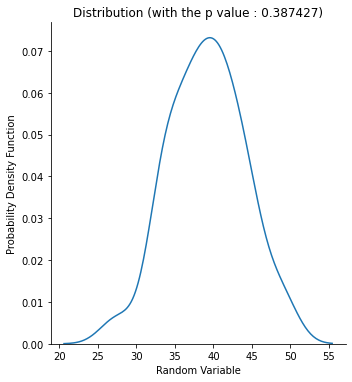

C:\Users\vaibh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


The Sample Proportion:  0.4
The Hypothesized Proportion:  0.5
Give the Confidence Interval (in percent): 90


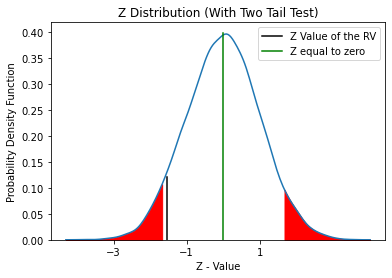

In [59]:
# a binomial distribution is created for testing purpose
bin_dis = pd.Series(stats.binom.rvs(n = 100, p = 0.4, size = 1000))

# sampling is been done
samp_dist = bin_dis.sample(60)

# the method is been invoked
prop_big_sample_test(samp_dist,0.4)